In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings

In [2]:
dir = os.path.dirname
path = dir(os.getcwd())
print(path)
sys.path.append(path)

d:\COSAS\BOOTCAMP\MLProyect


In [3]:
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']

In [4]:
dicc_train = []
image_size = 150
for i in labels:
    folderPath = dir(os.getcwd()) + os.sep + "data"+ os.sep +'Training' + os.sep + i
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        dicc_train.append({"Image":img, "Label":i, "Fullpath":os.path.join(folderPath,j)})

df_train = pd.DataFrame(dicc_train)
df_train.head()

100%|██████████| 827/827 [00:04<00:00, 174.96it/s]


,Image,Label,Fullpath
0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",glioma_tumor,d:\COSAS\BOOTCAMP\MLProyect\data\Training\glio...
1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",glioma_tumor,d:\COSAS\BOOTCAMP\MLProyect\data\Training\glio...
2,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",glioma_tumor,d:\COSAS\BOOTCAMP\MLProyect\data\Training\glio...
3,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",glioma_tumor,d:\COSAS\BOOTCAMP\MLProyect\data\Training\glio...
4,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",glioma_tumor,d:\COSAS\BOOTCAMP\MLProyect\data\Training\glio...


In [5]:
df_train.shape

(2870, 3)

In [6]:
#Creating test data
X_test = []
y_test = []
pathlist_test = []
dicc_test = []
image_size = 150
for i in labels:
    folderath = dir(os.getcwd()) + os.sep + 'data'+ os.sep +'Testing'+ os.sep + i
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_test.append(img)
        y_test.append(i)
        dicc_test.append({"Image":img, "Label":i, "Fullpath":os.path.join(folderPath,j)})

df_test = pd.DataFrame(dicc_test)
df_test.head()


100%|██████████| 827/827 [00:03<00:00, 256.95it/s]


,Image,Label,Fullpath
0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",glioma_tumor,d:\COSAS\BOOTCAMP\MLProyect\data\Training\pitu...
1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",glioma_tumor,d:\COSAS\BOOTCAMP\MLProyect\data\Training\pitu...
2,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",glioma_tumor,d:\COSAS\BOOTCAMP\MLProyect\data\Training\pitu...
3,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",glioma_tumor,d:\COSAS\BOOTCAMP\MLProyect\data\Training\pitu...
4,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",glioma_tumor,d:\COSAS\BOOTCAMP\MLProyect\data\Training\pitu...


In [7]:
X_train = df_train.Image
print('X_train',X_train.shape)
y_train = df_train.Label
print('y_train',y_train.shape)
X_test = df_test.Image
print('X_test', X_test.shape)
y_test = df_test.Label
print('y_test', y_test.shape)

X_train (2870,)
y_train (2870,)
X_test (3308,)
y_test (3308,)


In [8]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [10]:
effnet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))

In [53]:
model = effnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(4,activation='softmax')(model)
model = tf.keras.models.Model(inputs=effnet.input, outputs = model)

In [12]:
model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])

NameError: name 'model' is not defined

In [14]:
history = model.fit(X_train,y_train,validation_split=0.2, epochs =12, verbose=1, batch_size=32)

Epoch 1/12
72/72 [==============================] - 209s 3s/step - loss: 0.4093 - accuracy: 0.8375 - val_loss: 1.8626 - val_accuracy: 0.4199
Epoch 2/12
72/72 [==============================] - 198s 3s/step - loss: 0.1533 - accuracy: 0.9512 - val_loss: 1.4292 - val_accuracy: 0.5871
Epoch 3/12
72/72 [==============================] - 202s 3s/step - loss: 0.1145 - accuracy: 0.9621 - val_loss: 1.4484 - val_accuracy: 0.6132
Epoch 4/12
72/72 [==============================] - 200s 3s/step - loss: 0.0596 - accuracy: 0.9821 - val_loss: 0.5172 - val_accuracy: 0.8676
Epoch 5/12
72/72 [==============================] - 200s 3s/step - loss: 0.0459 - accuracy: 0.9839 - val_loss: 0.2068 - val_accuracy: 0.9460
Epoch 6/12
72/72 [==============================] - 212s 3s/step - loss: 0.0639 - accuracy: 0.9817 - val_loss: 0.3413 - val_accuracy: 0.9077
Epoch 7/12
72/72 [==============================] - 191s 3s/step - loss: 0.0377 - accuracy: 0.9869 - val_loss: 0.8891 - val_accuracy: 0.8031
Epoch 8/12
72

In [20]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

In [23]:
pred

array([3, 3, 3, ..., 3, 3, 3], dtype=int64)

In [25]:
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.25      0.02      0.04       827
           1       0.00      0.00      0.00       827
           2       0.25      0.05      0.08       827
           3       0.25      0.93      0.39       827

    accuracy                           0.25      3308
   macro avg       0.19      0.25      0.13      3308
weighted avg       0.19      0.25      0.13      3308

C:\Users\marin\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\marin\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predict

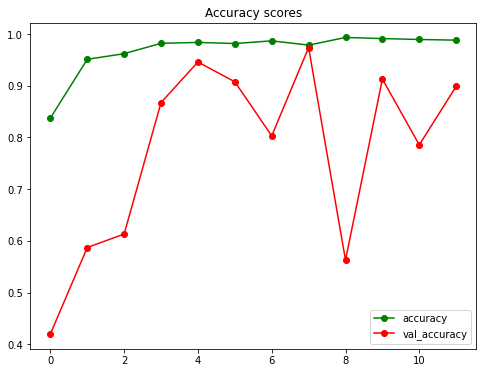

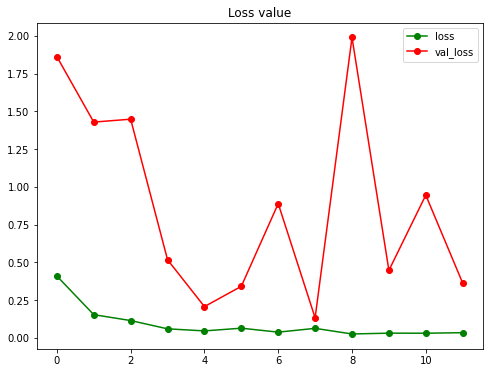

In [54]:
plt.figure(figsize=(8,6))
plt.title('Accuracy scores')
plt.plot(history.history['accuracy'],'go-')
plt.plot(history.history['val_accuracy'],'ro-')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()
plt.figure(figsize=(8,6))
plt.title('Loss value')
plt.plot(history.history['loss'],'go-')
plt.plot(history.history['val_loss'],'ro-')
plt.legend(['loss', 'val_loss'])
plt.show()

In [11]:
model.save('../models/model_1.h5')

NameError: name 'model' is not defined